In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation

from PointTracking_v2 import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

Let's run the animation with the ideal parameters found to yield stability in the simulation

Total Imag Time:  1.2831668853759766
kmax:  4.0212385965949355
T:  4.042589962686201
(9, 128, 128)
(1, 128, 128)


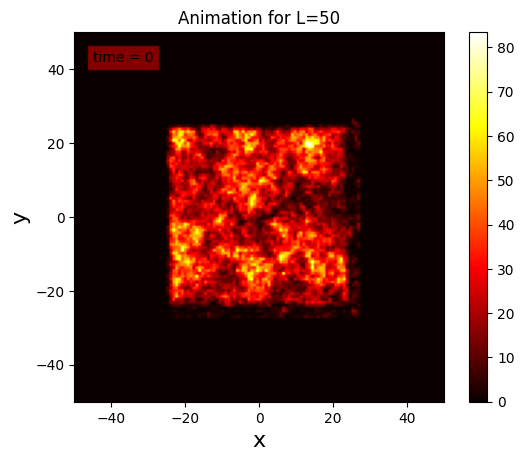

In [31]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 2000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 1/2, dst = False, vortex = True)

### Make a phase plot 

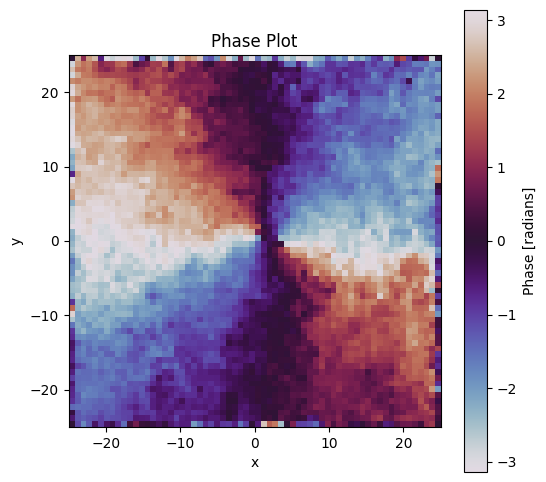

In [34]:
phase = np.angle(g.snaps[0][int(g.L/2/g.dx):int(3*g.L/2/g.dx), int(g.L/2/g.dx): int(3*g.L/2/g.dx)])

plt.figure(figsize=(6, 6))
plt.imshow(phase, extent=[-g.L/2, g.L/2, -g.L/2, g.L/2], origin='lower', cmap='twilight')
plt.colorbar(label='Phase [radians]')
plt.title('Phase Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)

### Circulation

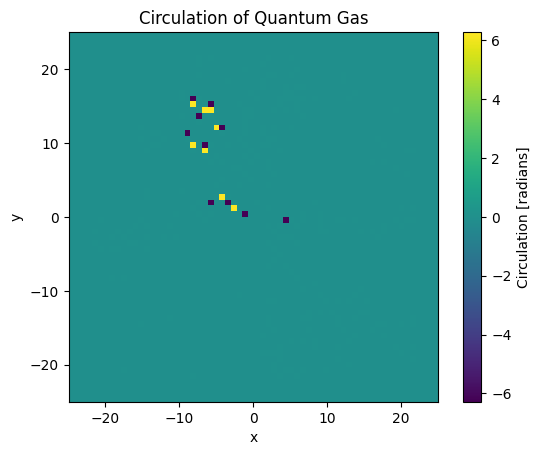

In [40]:
plt.figure() 
plt.imshow(tracker.circulation, extent=[-g.L/2, g.L/2, -g.L/2, g.L/2], origin='lower')
plt.colorbar(label = 'Circulation [radians]') 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circulation of Quantum Gas')
plt.show() 

### Tracking Algorithm

Now, let's implement the tracking for the vortices. The goal is to track the pair of vortices, allowing for the appearance of new vortices, but not tracking them. We can do this by finding the minimum distance between the current vortices and the vortices detected in the next frame.

Edge cases: 
1. What happens when there are extra vortices from the beginning of the simulation? How can you tell which ones are the original vortices? 
    - One solution: see where the vortices begin to disappear and remove them from tracking. This requires a remove function... 
2. What happens when a vortex-anti-vortex pair merges or anhilates? 
    - Also must remove vortices... 
3. Note that we also should not be tracking vortices of the type that were NOT spawned in the first place! filter out this ones via an if statement somewhere

In [4]:
v_traj, antiv_traj = pt.labelVortices(tracker) 

Vortex Trajectory:  [[38.671875 14.453125]
 [38.671875 14.453125]]
Vortex Trajectory:  [[40.234375 14.453125]
 [40.234375 14.453125]]
Vortex Trajectory:  [[30.078125 23.828125]
 [30.078125 23.828125]]
Vortex Trajectory:  [[23.046875 26.171875]
 [23.046875 26.171875]]
Vortex Trajectory:  [[20.703125 28.515625]
 [20.703125 28.515625]]
Vortex Trajectory:  [[10.546875 34.765625]
 [10.546875 34.765625]]
Vortex Trajectory:  [[16.796875 34.765625]
 [16.796875 34.765625]]
Vortex Trajectory:  [[18.359375 35.546875]
 [18.359375 35.546875]]
Vortex Trajectory:  [[10.546875 36.328125]
 [10.546875 36.328125]]
Vortex Trajectory:  [[15.234375 36.328125]
 [15.234375 36.328125]]
Vortex Trajectory:  [[23.828125 37.890625]
 [23.828125 37.890625]]
Vortex Trajectory:  [[19.921875 39.453125]
 [19.921875 39.453125]]
Vortex Trajectory:  [[15.234375 41.015625]
 [15.234375 41.015625]]
AntiVortex Trajectory:  [[41.015625 13.671875]
 [41.015625 13.671875]]
AntiVortex Trajectory:  [[39.453125 14.453125]
 [39.453125

In [10]:
print(np.shape(v_traj[0]))
print(v_traj)

(9, 2)
[array([[38.671875, 14.453125],
       [38.671875, 14.453125],
       [38.671875, 14.453125],
       [38.671875, 14.453125],
       [38.671875, 14.453125],
       [38.671875, 14.453125],
       [38.671875, 14.453125],
       [38.671875, 14.453125],
       [22.265625, 26.171875]]), array([[40.234375, 14.453125],
       [40.234375, 14.453125],
       [40.234375, 14.453125],
       [40.234375, 14.453125],
       [40.234375, 13.671875],
       [40.234375, 12.890625],
       [38.671875, 14.453125],
       [38.671875, 14.453125],
       [22.265625, 26.171875]]), array([[30.078125, 23.828125],
       [30.078125, 23.828125],
       [30.078125, 23.828125],
       [26.953125, 29.296875],
       [25.390625, 33.203125],
       [23.046875, 26.171875],
       [23.046875, 26.171875],
       [23.046875, 26.171875],
       [22.265625, 26.171875]]), array([[23.046875, 26.171875],
       [23.046875, 26.171875],
       [23.046875, 26.171875],
       [21.484375, 26.953125],
       [21.484375, 26.953

In [60]:
print(np.shape(v_traj)) 
print(np.shape(antiv_traj))

(13, 9, 2)
(15, 9, 2)


In [ ]:
# TODO: figure out why the antivortex trajectory is outputting all the same point regardless of if there is other points being printed above 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


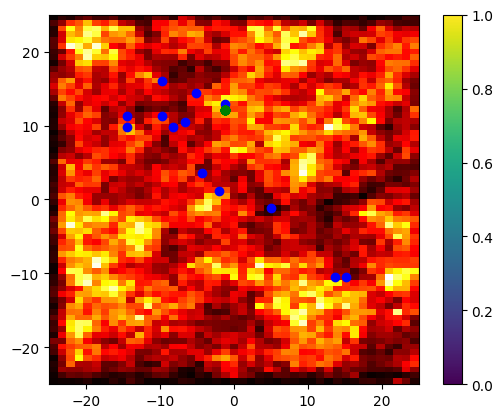

In [64]:
# create a frame-by-frame plot for this
v_traj_arr = np.array(v_traj) 
antiv_traj_arr = np.array(antiv_traj) 

snap_index = 0  
plt.figure() 
plt.imshow(np.abs(g.snaps[snap_index][int(g.L/2/g.dx):int(3*g.L/2/g.dx),int(g.L/2/g.dx):int(3*g.L/2)])**2, extent=[-g.L/2, g.L/2, -g.L/2, g.L/2], cmap = plt.cm.hot) # density disrtibution
for i in range(len(v_traj_arr)): 
    plt.scatter(*v_traj_arr[:,snap_index][i]-g.L/2, color = 'blue')
for i in range(len(antiv_traj_arr)): 
    print(i)
    plt.scatter(*antiv_traj_arr[:,snap_index][i]-g.L/2, color = 'green')
plt.colorbar() 



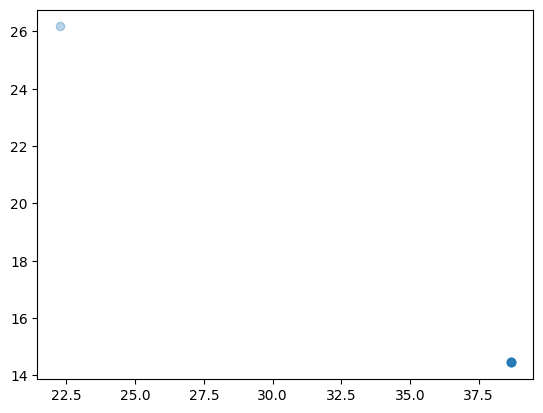

In [14]:
for i in range(1): 
    plt.scatter(*v_traj[i].T, alpha = 0.3)

### MISC Notes

To be done - fix the pre-existing tracker to track only the main vortices and ignore the other ones 

Do this by doing the same euclidean distance thing in the newer algorithm and ignore all points that are not used. This should theoretically work... 

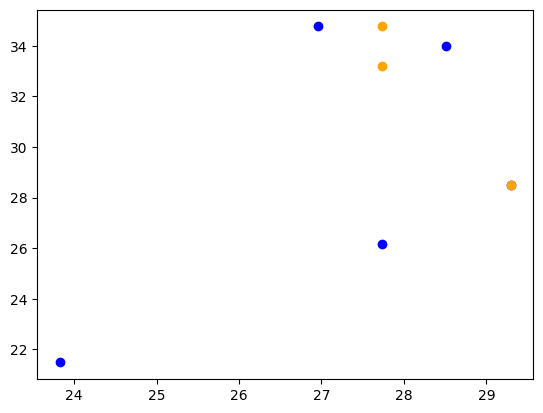

In [7]:
from scipy.cluster.vq import vq

features  = np.array([(29.296875, 28.515625), (27.734375, 33.203125), (27.734375, 34.765625)])

code_book = np.array([[23.828125, 21.484375],[27.734375, 26.171875],[29.296875, 28.515625],[28.515625, 33.984375],[26.953125, 34.765625]])

plt.figure() 
for i in range(len(code_book)): 
    plt.scatter(code_book[i][0], code_book[i][1], color = 'blue')
for i in range(len(features)): 
    plt.scatter(features[i][0], features[i][1], color = 'orange')
plt.show() 


In [6]:
vq( features, code_book)

(array([2, 3, 4]), array([0.        , 1.10485435, 0.78125   ]))

In [ ]:
from collections import defaultdict
source = "ABABDBAAEDSBQEWBAFLSAFB"
def list_duplicates(seq):
    tally = defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i)
    return ((key,locs) for key,locs in tally.items() if len(locs)>1)

for dup in sorted(list_duplicates(source)):
    print(dup)